#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read data and get the necessary information

In [2]:
data=pd.read_csv("data/scraped/all_data_scraped.csv")
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,legitimate
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\r\n\r\nThe reques...,no_brand,phishing
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,legitimate
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,phishing
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,legitimate
...,...,...,...,...,...,...,...
4718,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\r\n\r\nThe requested URL was not fou...,no_brand,phishing
4719,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,phishing
4720,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\r\n\r\nDoujinshi\r\n\r\nDor...,no_brand,legitimate
4721,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,phishing


In [3]:
data.shape

(4723, 7)

In [4]:
data.describe()

,red,green,blue
count,4723.000000,4723.000000,4723.000000
mean,224.683040,224.892653,225.974381
std,68.854573,67.889976,65.673415
min,0.000000,0.000000,0.000000
25%,247.000000,247.000000,246.000000
50%,254.000000,254.000000,254.000000
75%,254.000000,254.000000,254.000000
max,255.000000,255.000000,255.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   URL         4723 non-null   object 
 1   red         4723 non-null   float64
 2   green       4723 non-null   float64
 3   blue        4723 non-null   float64
 4   text        4364 non-null   object 
 5   brand_name  4723 non-null   object 
 6   status      4723 non-null   object 
dtypes: float64(3), object(4)
memory usage: 258.4+ KB


#### Null values

In [6]:
data.isnull().any()

URL           False
red           False
green         False
blue          False
text           True
brand_name    False
status        False
dtype: bool

In [7]:
data.isnull().sum()

URL             0
red             0
green           0
blue            0
text          359
brand_name      0
status          0
dtype: int64

In [8]:
#removing null values
data=data.dropna().reset_index(drop=True)
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,legitimate
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\r\n\r\nThe reques...,no_brand,phishing
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,legitimate
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,phishing
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,legitimate
...,...,...,...,...,...,...,...
4359,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\r\n\r\nThe requested URL was not fou...,no_brand,phishing
4360,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,phishing
4361,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\r\n\r\nDoujinshi\r\n\r\nDor...,no_brand,legitimate
4362,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,phishing


In [9]:
data.shape

(4364, 7)

#### converting class labels into 0's and 1's

In [10]:
data['status']=np.where(data['status']=="legitimate",0,1)
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\r\n\r\nThe reques...,no_brand,1
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,1
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
...,...,...,...,...,...,...,...
4359,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\r\n\r\nThe requested URL was not fou...,no_brand,1
4360,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
4361,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\r\n\r\nDoujinshi\r\n\r\nDor...,no_brand,0
4362,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,1


#### class distribution

In [11]:
data['status'].value_counts()

1    2353
0    2011
Name: status, dtype: int64

<AxesSubplot: xlabel='status', ylabel='count'>

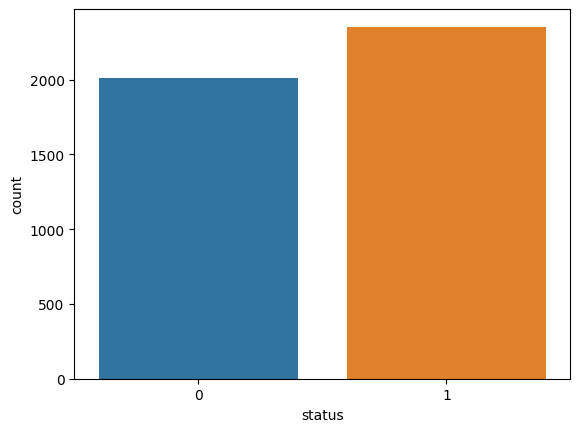

In [12]:
sns.countplot(x=data['status'])

#### total unique values for each feature
Total unique values in red, green and blue being around 200, out of 4364 rows, might tell us something about its influence on the target.

In [13]:
data.nunique(axis=0,dropna=True)

URL           4363
red            203
green          204
blue           216
text          3357
brand_name       9
status           2
dtype: int64

#### duplicated rows
Notice that the number of unique URL's are not 4364, which means there is a copy of one URL.

In [14]:
url_dup=data[data.duplicated()]

In [15]:
url_dup

,URL,red,green,blue,text,brand_name,status
1452,http://e710z0ear.du.r.appspot.com/c:/users/use...,254.0,254.0,254.0,Error: Page not found\r\n\r\nThe requested URL...,no_brand,1


In [16]:
u=url_dup['URL']
u

1452    http://e710z0ear.du.r.appspot.com/c:/users/use...
Name: URL, dtype: object

In [17]:
data=data.drop_duplicates(keep='first').reset_index(drop=True)
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\r\n\r\nThe reques...,no_brand,1
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,1
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
...,...,...,...,...,...,...,...
4358,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\r\n\r\nThe requested URL was not fou...,no_brand,1
4359,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
4360,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\r\n\r\nDoujinshi\r\n\r\nDor...,no_brand,0
4361,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,1


In [18]:
data.nunique(axis=0,dropna=True)

URL           4363
red            203
green          204
blue           216
text          3357
brand_name       9
status           2
dtype: int64

#### exploring with the rgb features and scaling the colors by a factor of 255

In [19]:
# print(data['red'].value_counts(254))
(data['red']==254).value_counts()

True     2445
False    1918
Name: red, dtype: int64

In [20]:
c_254=data.loc[(data['red']==254) & (data['blue']==254) & (data['green']==254)]
c_254

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,1
6,http://superbahisgirisadresimiz3.blogspot.com,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,1
7,http://paypal-verification.applmanager.com/cus...,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,1
...,...,...,...,...,...,...,...
4354,https://en.m.wikipedia.org/wiki/Closed-source,254.0,254.0,254.0,= WIKIPEDIA Q Search Wikipedia\r\n\r\nPropriet...,no_brand,0
4355,https://steancommuhity.ru/profiles/7656224898287,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,1
4356,http://het-impp11.com/servi-mail-pro-webb11192...,254.0,254.0,254.0,Your connection is not private\r\n\r\nAttacker...,no_brand,1
4358,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\r\n\r\nThe requested URL was not fou...,no_brand,1


In [21]:
c_253=data.loc[(data['red']==253) & (data['blue']==253) & (data['green']==253)]
c_253

,URL,red,green,blue,text,brand_name,status
14,https://duosecurity.com,253.0,253.0,253.0,stftenfae\r\ncisco\r\n\r\n» wo Product Edition...,no_brand,0
57,http://www.tesdaonline.info/,253.0,253.0,253.0,: we\r\nTESDA Scholarship Alert Ne\r\n\r\nRE T...,no_brand,0
69,https://en.wikipedia.org/wiki/Router_table_(wo...,253.0,253.0,253.0,WIKIPEDIA\r\n\r\nThe Free Encyclopedia\r\n\r\n...,no_brand,0
126,http://professorclaudineicamolesi.blogspot.com/,253.0,253.0,253.0,More ¥\r\n\r\nArmazem da Lingua Portug!\r\n\r\...,no_brand,0
142,http://www.helix-institute.com/,253.0,253.0,253.0,‘foundation\r\n\r\n=\r\n. roy a\r\nMicroSave D...,no_brand,0
...,...,...,...,...,...,...,...
4288,https://www.craftbeer.com/styles/session-beer,253.0,253.0,253.0,a\r\nBEERC/COM BEER BREWERIES FOOD NEWS Q FOLL...,no_brand,0
4303,http://www.nchsoftware.com/classic/index.html,253.0,253.0,253.0,NCH Software\r\nHome Download Screenshots Supp...,no_brand,0
4325,http://attention.solution.valid.clearpointsupp...,253.0,253.0,253.0,This Account has been suspended.\r\n\r\nContac...,no_brand,1
4343,http://arrowsurfandsport.com/jcroofinginc/jcro...,253.0,253.0,253.0,This Account has been suspended.\r\n\r\nContac...,no_brand,1


#### Scaling of the colors

In [22]:
for i in range(len(data['red'])):
    data['red'][i] = data['red'][i] / 255
for i in range(len(data['green'])):
    data['green'][i] = data['green'][i] / 255
for i in range(len(data['blue'])):
    data['blue'][i] = data['blue'][i] / 255

C:\Users\asus_\AppData\Local\Temp\ipykernel_27724\4133713521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red'][i] = data['red'][i] / 255
C:\Users\asus_\AppData\Local\Temp\ipykernel_27724\4133713521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['green'][i] = data['green'][i] / 255
C:\Users\asus_\AppData\Local\Temp\ipykernel_27724\4133713521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['blue'][i] = da

In [23]:
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,0.996078,0.996078,0.996078,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://shatorupa.com/receipe/micro/adobe/,0.117647,0.125490,0.145098,Resource not found Error 404\r\n\r\nThe reques...,no_brand,1
2,http://www.destroyalllines.com/,0.996078,0.996078,0.996078,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,0.996078,0.996078,0.996078,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,1
4,http://seanorr.tumblr.com,0.992157,0.992157,0.941176,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
...,...,...,...,...,...,...,...
4358,http://www.consultax.cl/thecrowngroup/tcwoodin...,0.996078,0.996078,0.996078,Not Found\r\n\r\nThe requested URL was not fou...,no_brand,1
4359,http://frosty-nobel-ca7f68.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
4360,https://hentaifox.com,0.101961,0.098039,0.098039,Ge Random Parodies\r\n\r\nDoujinshi\r\n\r\nDor...,no_brand,0
4361,http://secureupdate.appleld.com.duilawyeryork....,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1


### Work with the 'text' feature

#### Getting the general idea of the type of texts we will be dealing with, since the total unique values in dataset for 'text' is NOT the total rows. Which says that it needs some work.

In [24]:
c_253['text'][4362]

"This website uses cookies to ensure you get the best experience on our website. Learn more\r\n\r\nHOME START GROW ARTICLES PRODUCTS DEALS FREEBIES CONTACT\r\n\r\nSearch Engine Optimization for\r\nPhotographers — SEO Basics\r\n\r\nLAST UPDATED ON JULY 3, 2020 BY ZACH PREZ\r\n\r\n** This post contains affiliate links and | will be compensated if\r\nyou make a purchase after clicking through my links. As an\r\nAmazon Associate | earn from qualifying purchases.\r\n\r\nOpinions expressed are based on the Author's own\r\nexperience.\r\n\r\n—  . ° ill —_\r\n\r\nGUIDES\r\n\r\nClick to learn more:\r\n\r\nSEO Cookbook for Photographers\r\n\r\nBusiness Planning Cookbook\r\n\r\nPerfect Facebook Ads\r\n\r\nHow to Start a Photography Business"

In [25]:
data.nunique()

URL           4363
red            203
green          204
blue           216
text          3357
brand_name       9
status           2
dtype: int64

In [26]:
data['text'].value_counts()

Error: Page not found\r\n\r\nThe requested URL was not found on this server.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     129
Your connection is not private\r\n\r\nAttackers might be trying to steal your information from supp

In [27]:
# created a dataframe to make it look cleaner
ty=pd.DataFrame(data=data['text'].value_counts().sort_values(ascending=False))

In [28]:
# counts=1 means that the web page scraped might be valid and working. so removing those
ty=ty.loc[ty['text'] != 1]

#### Removing texts with counts more than 1. This has been analysed thoroughly, and they really are different types of errors only.

In [29]:
rem_index = []
for i in range(len(ty)):
    common_loc = data.loc[data['text'] == ty.index[i]]
    for j in range(len(data)):
        if data['text'][j] == ty.index[i]:
            rem_index.append(j)
    del common_loc 
len(rem_index)

1258

In [30]:
data=data.drop(labels=rem_index,axis=0)
data=data.reset_index(drop=True)

In [31]:
data.nunique()

URL           3105
red            201
green          202
blue           212
text          3105
brand_name       9
status           2
dtype: int64

#### Removing texts with "site not found". They weren't present in the above table "ty", since each "Site Not Found" message has the site's name in it, which makes it unique.

In [32]:
te=[]
for i in range(len(data)):
    if "Site Not Found" in data['text'][i]:
        te.append(i)
        
te

[227, 494, 548, 606, 886, 891, 1513, 1675, 1955, 2674, 2748, 2759, 2907, 3102]

In [33]:
temp = data[data.index.isin(te)]
temp

,URL,red,green,blue,text,brand_name,status
227,http://heuristic-varahamihira-fec04e.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
494,https://pedantic-stonebraker-76a8a7.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
548,http://adoring-yalow-fd2ea6.netlify.app/?realm...,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
606,http://clinks.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
886,http://musing-villani-4a7781.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
891,https://elastic-poincare-1fdcbc.netlify.app/?r...,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
1513,http://friendly-stonebraker-12bd85.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
1675,http://peaceful-feynman-b64b83.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
1955,http://practical-shockley-f451be.netlify.app/?...,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1
2674,http://hopeful-wescoff-551e53.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\r\n\r\nLooks like you've follow...,no_brand,1


In [34]:
data=data.drop(labels=te,axis=0)
data=data.reset_index(drop=True)

In [35]:
data.shape

(3091, 7)

#### Removing texts with '404' message.

In [36]:
four_o_four = []
for i in range(len(data)):
    if "404" in data['text'][i]:
        four_o_four.append(i)
four_o_four

[13,
 33,
 43,
 74,
 106,
 109,
 112,
 176,
 207,
 277,
 318,
 322,
 351,
 380,
 404,
 425,
 435,
 442,
 455,
 478,
 482,
 495,
 534,
 602,
 615,
 687,
 716,
 791,
 879,
 905,
 921,
 929,
 941,
 954,
 1043,
 1072,
 1092,
 1125,
 1129,
 1137,
 1151,
 1160,
 1177,
 1225,
 1279,
 1341,
 1356,
 1399,
 1414,
 1436,
 1454,
 1473,
 1555,
 1572,
 1586,
 1603,
 1659,
 1673,
 1692,
 1694,
 1861,
 1870,
 1885,
 1916,
 1917,
 1961,
 1977,
 1980,
 2006,
 2014,
 2020,
 2025,
 2065,
 2071,
 2081,
 2151,
 2154,
 2164,
 2177,
 2218,
 2227,
 2230,
 2237,
 2243,
 2265,
 2277,
 2313,
 2383,
 2405,
 2437,
 2496,
 2504,
 2580,
 2596,
 2690,
 2703,
 2729,
 2798,
 2799,
 2821,
 2844,
 2846,
 2847,
 2870,
 2924,
 2976,
 3019,
 3024,
 3054,
 3069,
 3074,
 3077,
 3083]

In [37]:
temp = data[data.index.isin(four_o_four)]
temp

,URL,red,green,blue,text,brand_name,status
13,https://incsupdate.tumblr.com/,0.996078,0.996078,0.996078,Error 404 - Not found\r\n\r\nLe fichier requis...,no_brand,1
33,http://googlefoundation.somee.com/google/,0.996078,0.996078,0.996078,HTTP Error 404.0 - Not Found\r\n\r\nThe resour...,no_brand,1
43,https://www2.deloitte.com/content/dam/Deloitte...,0.996078,0.996078,0.996078,) eloitte Services » Industries » Insights » C...,no_brand,0
74,http://www.siemon.com/us/white_papers/07-03-01...,0.996078,0.996078,0.996078,@- Ask Siemon | Contact | Blog\r\n\r\n™ ENVIRO...,no_brand,0
106,https://steanmcommunity.com/gift-card,0.996078,0.996078,0.996078,404 - Not found\r\n\r\nThe requested file does...,no_brand,1
...,...,...,...,...,...,...,...
3054,https://anahitagirted.uno,0.996078,0.996078,0.996078,Bs\r\n\r\nThis anahitagirted.uno page can't be...,no_brand,0
3069,http://alburjrealestate.com/routes/alldomain/c...,0.996078,0.996078,0.996078,404 | Not Found,no_brand,1
3074,https://aliyuncs.com,0.996078,0.996078,0.996078,404 Not Found\r\n\r\nSorry for the inconvenien...,no_brand,0
3077,https://www.dssresearch.com/Solutions/Strategy...,0.984314,0.984314,0.984314,"Ooops... Error 404\r\n\r\nWe are sorry, but th...",no_brand,0


In [38]:
temp = temp.reset_index(drop=True)

In [39]:
# Just for info. There indeed is a url with apple as a brand name.
(temp['brand_name']).value_counts()

no_brand    112
Apple         1
Name: brand_name, dtype: int64

In [40]:
data=data.drop(labels=four_o_four,axis=0)
data=data.reset_index(drop=True)

In [41]:
data.shape

(2978, 7)

#### Removing texts with '500 error' message. Still haven't removed these completely, since some scraped websites might have the word '500' in it.

In [ ]:
# five_hundred = []
# for i in range(len(data)):
#     if "500" in data['text'][i]:
#         five_hundred.append(i)
# five_hundred

In [ ]:
# temp = data.loc[data.index.isin(five_hundred)]
# temp = temp.reset_index(drop=True)

In [ ]:
# temp['text'][0]

#### Removing texts with 'Internal Server Error' message. Still haven't removed these.

In [42]:
internal_server_error = []
for i in range(len(data)):
    f = (data['text'][i]).lower()
    if "internal server error" in f:
        internal_server_error.append(i)
internal_server_error

[275, 280, 506, 655, 773, 1216, 2503, 2578]

#### Removing texts with 'This page isn't working' message.

In [43]:
page_not_working = []
for i in range(len(data)):
#     f = (data['text'][i]).lower()
    if "This page isn’t working" in data['text'][i]:
        page_not_working.append(i)
page_not_working

[340, 448, 765, 772, 925, 1419, 1587, 1593, 1654, 1855, 2127, 2697, 2735, 2863]

In [44]:
temp = data.loc[data.index.isin(page_not_working)]
temp = temp.reset_index(drop=True)
temp

,URL,red,green,blue,text,brand_name,status
0,http://urologysocietypune.com/wp-content/plugi...,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\nurologyso...,no_brand,1
1,http://clean-cut.co.uk/adm/u00m/checkpoint/mn/,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\n\r\nclean...,no_brand,1
2,http://yvddgk.gq/b/ver.php?e=adevins@prepaidle...,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\nIf the pr...,no_brand,1
3,https://bdys01.com,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\n\r\nbdys0...,no_brand,0
4,https://www.ulrc.go.ug/scripts/?cliente=3D6624...,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\n\r\nwww.u...,no_brand,1
5,http://www.drahim.com/forum/index.php,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\nwww.drahi...,no_brand,0
6,https://eterrain.ci/wp-includes/SimplePie/deco...,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\neterrain....,no_brand,1
7,https://animego.org,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\nanimego.o...,no_brand,0
8,https://www.mamujutengahkab.go.id/terasconfig/...,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\nwww.mamuj...,no_brand,1
9,http://www.ganamela.com/wp-admin/includes/002/...,0.996078,0.996078,0.996078,Bs\r\n\r\nThis page isn’t working\r\nwww.ganam...,no_brand,1


In [45]:
data=data.drop(labels=page_not_working,axis=0)
data=data.reset_index(drop=True)

In [46]:
data.shape

(2964, 7)

#### Removing texts with 'Your connection is not private' message.

In [47]:
conn_not_private = []
for i in range(len(data)):
#     f = (data['text'][i]).lower()
    if "Your connection is not private" in data['text'][i]:
        conn_not_private.append(i)
conn_not_private

[4,
 5,
 7,
 8,
 14,
 20,
 35,
 59,
 64,
 66,
 78,
 82,
 86,
 90,
 97,
 98,
 105,
 109,
 116,
 119,
 127,
 128,
 129,
 131,
 149,
 157,
 161,
 171,
 176,
 178,
 181,
 183,
 186,
 188,
 190,
 192,
 194,
 201,
 202,
 204,
 205,
 212,
 224,
 228,
 233,
 234,
 241,
 244,
 246,
 257,
 262,
 270,
 283,
 285,
 288,
 289,
 290,
 295,
 298,
 308,
 311,
 312,
 317,
 322,
 327,
 329,
 342,
 354,
 356,
 370,
 371,
 379,
 386,
 388,
 390,
 393,
 398,
 401,
 406,
 407,
 413,
 421,
 425,
 433,
 434,
 435,
 436,
 439,
 452,
 454,
 457,
 465,
 469,
 482,
 493,
 495,
 507,
 517,
 518,
 521,
 525,
 530,
 545,
 550,
 564,
 568,
 574,
 578,
 580,
 581,
 588,
 591,
 597,
 599,
 602,
 605,
 621,
 633,
 634,
 635,
 657,
 673,
 678,
 679,
 689,
 691,
 695,
 697,
 704,
 706,
 717,
 729,
 732,
 735,
 737,
 748,
 751,
 753,
 764,
 772,
 788,
 800,
 801,
 809,
 811,
 822,
 827,
 829,
 839,
 846,
 853,
 860,
 881,
 885,
 890,
 902,
 905,
 909,
 912,
 918,
 921,
 925,
 939,
 944,
 951,
 955,
 964,
 971,
 979,
 988,


In [48]:
len(conn_not_private)

583

In [49]:
temp = data.loc[data.index.isin(conn_not_private)]
temp = temp.reset_index(drop=True)
temp

,URL,red,green,blue,text,brand_name,status
0,http://app-okeefe382hania.ivspcrjvuy-95m32219l...,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1
1,http://peparena.world/New1,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1
2,http://copyright-teamhelp.com/username.php,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1
3,https://www.toppro10.com/,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,0
4,http://cbango.com.ar/img/,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1
...,...,...,...,...,...,...,...
578,http://00324il.moonfruit.com,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1
579,https://prth.talkincat.com/tz?jk=ZH9wlG9ma2Kcl...,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1
580,https://onelink.me,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,0
581,http://secppal.xyz/,0.996078,0.996078,0.996078,Your connection is not private\r\n\r\nAttacker...,no_brand,1


In [50]:
data=data.drop(labels=conn_not_private,axis=0)
data=data.reset_index(drop=True)

In [51]:
data.shape

(2381, 7)

In [52]:
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,0.996078,0.996078,0.996078,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,0.996078,0.996078,0.996078,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
2,http://www.east38.com/content/102/shippingdoc....,0.996078,0.996078,0.996078,HugeDomains.. oT scorch RR\r\n\r\nHome | FAQs ...,no_brand,1
3,http://seanorr.tumblr.com,0.992157,0.992157,0.941176,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
4,https://nudemilitarygirls.tumblr.com/#_=_,0.929412,0.929412,0.929412,t Q Search Tumblr\r\n\r\nV\r\n\r\nUntitled,no_brand,0
...,...,...,...,...,...,...,...
2376,https://myflixer.to,0.109804,0.223529,0.423529,@ Home Movies TV Shows Top IMDB\r\nZl\r\n\r\na...,no_brand,0
2377,https://www.tumblr.com/safe-mode?url=http%3A%2...,0.000000,0.000000,0.000000,t Q Search Tumbir\r\n\r\no*\r\n‘\r\nThis Tumbl...,no_brand,0
2378,https://en.m.wikipedia.org/wiki/Closed-source,0.996078,0.996078,0.996078,= WIKIPEDIA Q Search Wikipedia\r\n\r\nPropriet...,no_brand,0
2379,https://hentaifox.com,0.101961,0.098039,0.098039,Ge Random Parodies\r\n\r\nDoujinshi\r\n\r\nDor...,no_brand,0


### Further to-do:-
- One-hot encoding for brands. Although there are some ml algs that do not require categorical data to be converted to numerical.
- General data analysis